# 서로소 집합 자료구조

- 합집합: 두 개의 원소가 포함된 집합을 하나의 집합으로 합친다.
- 찾기: 특정한 원소가 속한 집합이 어떤 집합인지 알려준다.

--> 합치기 찾기(Union Find) 자료 구조라고도 불린다.

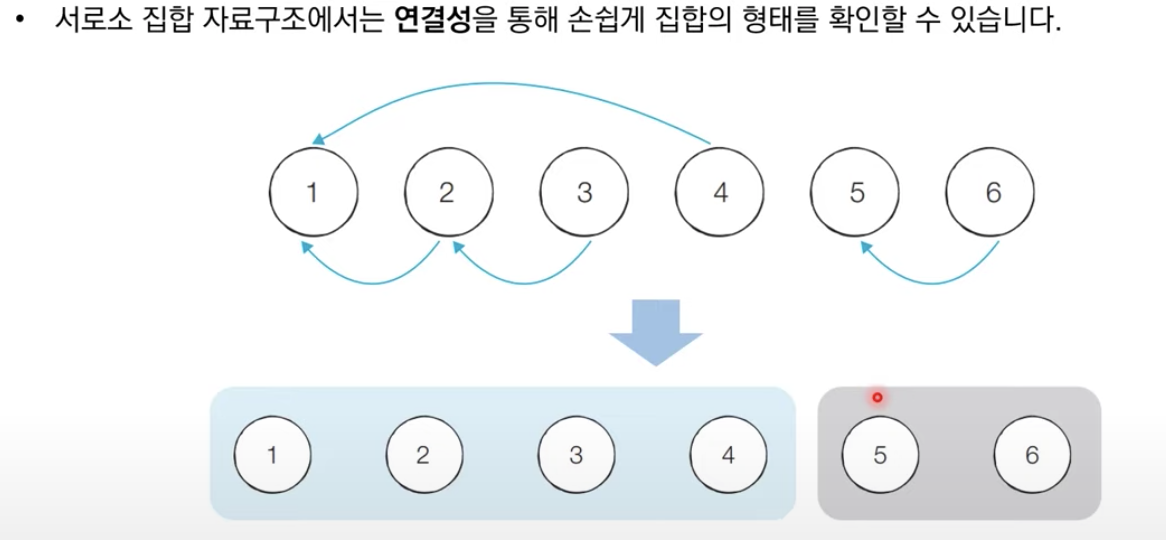

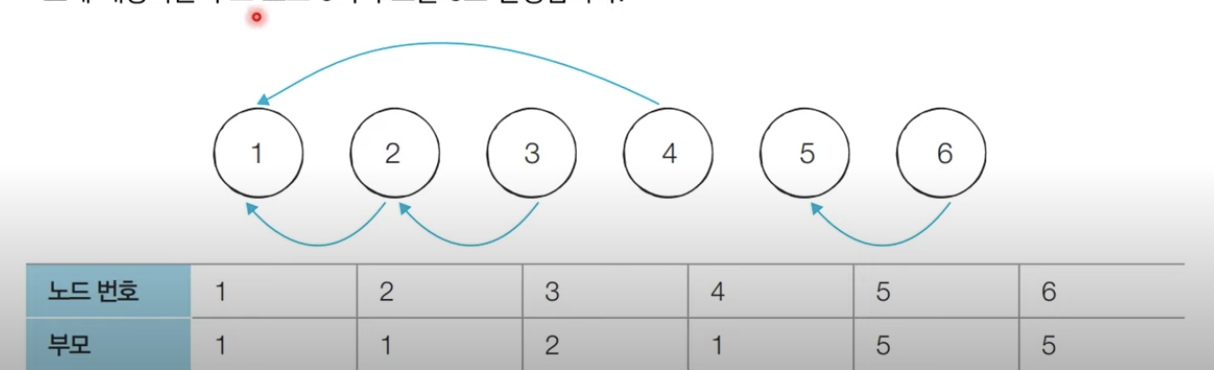

In [ ]:
# 특정 원소가 속한 집합을 찾기
# root 찾는 거네
def find_parent(parent, x):
    if parent[x] != x:
        return find_parent(parent,parend[x])
    return x

# 두 원소가 속한 집합을 찾기
def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    
    #parent를 더 낮은 수로 바꾸기
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

# 노드의 개수와 간선(Union 연산)의 개수 입력 받기
v,e = map(int, input().split())
parent = [0] * (v+1) # 부모 테이블 초기화하기

# 부모를 자기 자신으로 초기화
for i in range(1,v+1):
    partent[i] = i

# union 연산 수행
for i in range(e):
    a,b = map(int, input().split())
    union_parent(parent, a, b)

# 각 원소가 속한 집합 출력
print("각 원소가 속한 집합:", end= "")
for i in range(1,v+1):
    print(find_parent(parent, i), end = " ") #각 원소의 root를 알려주겠지

# 부모 테이블 내용출력하기
print("부모테이블: ")
for i n range(1,v+1):
    print(parent[i], end = " ")

## 그러나, 이러한 서로소 집합 자료구조는 구현 방법의 문제를 가진다.

Linked List처럼 연결되어 있는 경우, O(V) 만큼의 시간 복잡도를 가진다.

In [ ]:
#해결방법: find 함수를 호출할때, 각각의 parent를 root 노드로 바꿔준다. 
def find_parent(parent, x):
    if parent[x] != x:
        parent[x] =  find_parent(parent,parend[x])
    return parent[x]

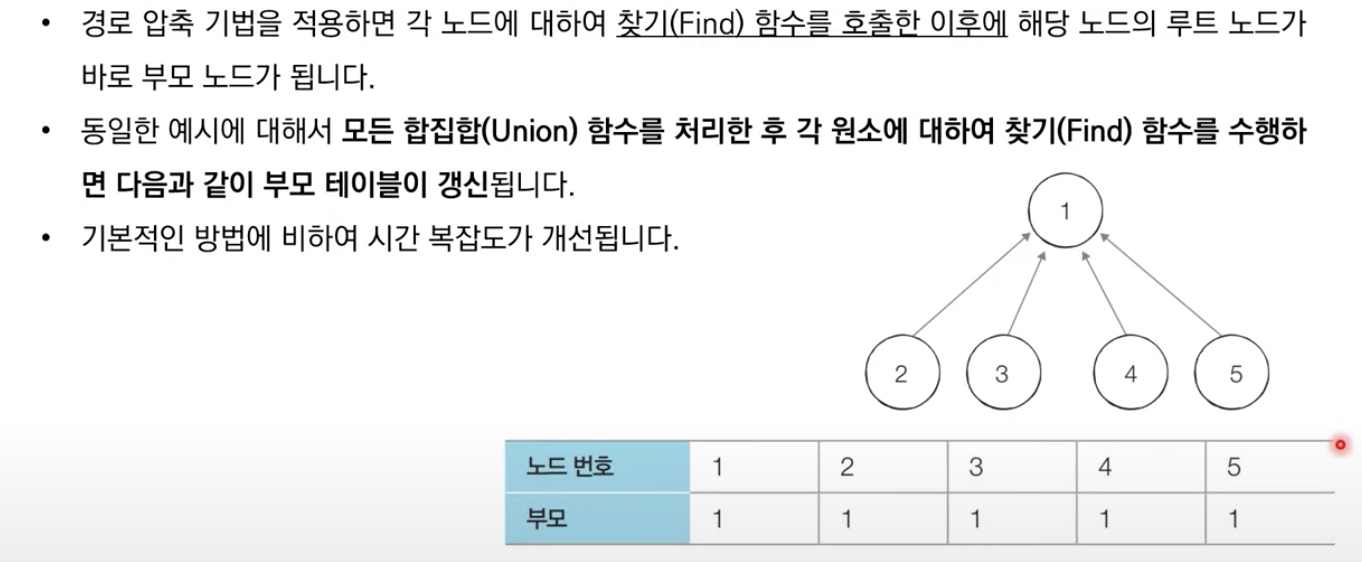

# 서로 집합을 활용한 사이클 판별

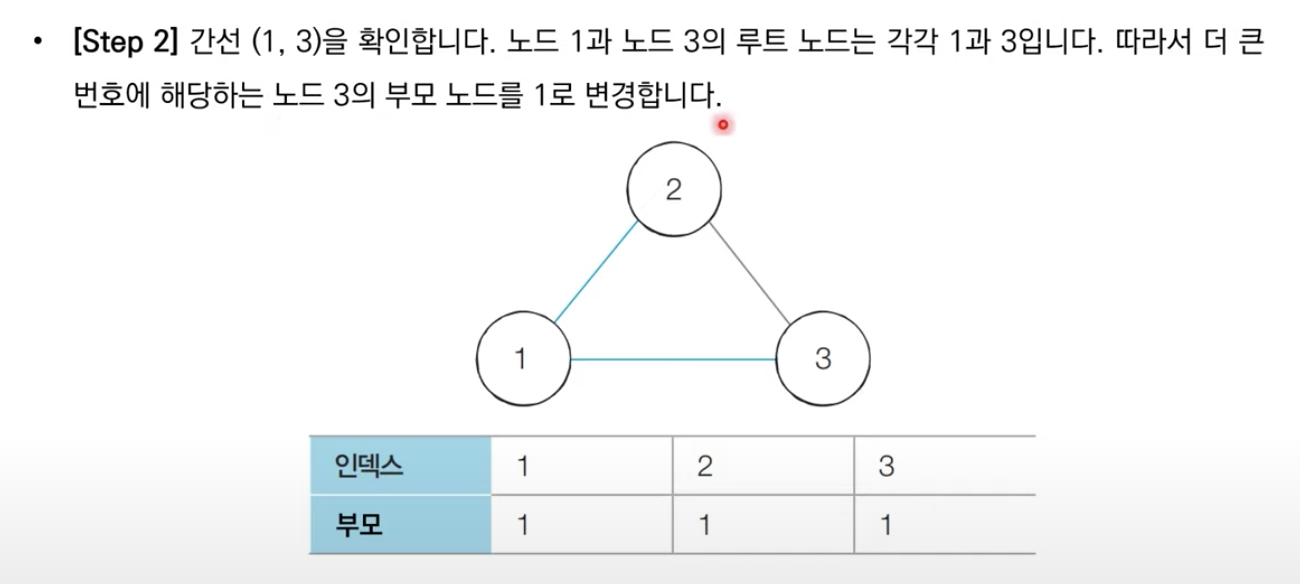

2 --> 1 --> 3
<br>
3 --> 1 --> 2

하나의 집합으로 묶이면 사이클이 발생한다고 판단한다.


In [1]:
def find_parent(parent,x):
    if parent[x] != x:
        parent[x] = find_parent(parent,parent[x])
    return parent[x]

def union_parent(parent, a, b):
    a = find_parent(parent,a)
    b = find_parent(parent,b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b
        
# 노드의 개수와 간선(Union 연산)의 개수 입력 받기
v,e = map(int, input().split())
parent = [0] * (v+1) # 부모 테이블 초기화하기

# 부모를 자기 자신으로 초기화
for i in range(1,v+1):
    partent[i] = i

Cycle = False
# union 연산 수행
for i in range(e):
    a,b = map(int, input().split())
    if find_parent(parent,a) == find_parent(parent,b):
        Cycle = True
        break
    else:
        union_parent(parent,a,b)

if Cycle:
    print("사이클이 발생했습니다.")
else:
    print("사이클이 발생하지 않았습니다.")

ㅇ


ValueError: invalid literal for int() with base 10: 'ㅇ'

# 신장트리
--> 모든 노드를 포함하고, 사이클이 발생하지 않아야 한다.
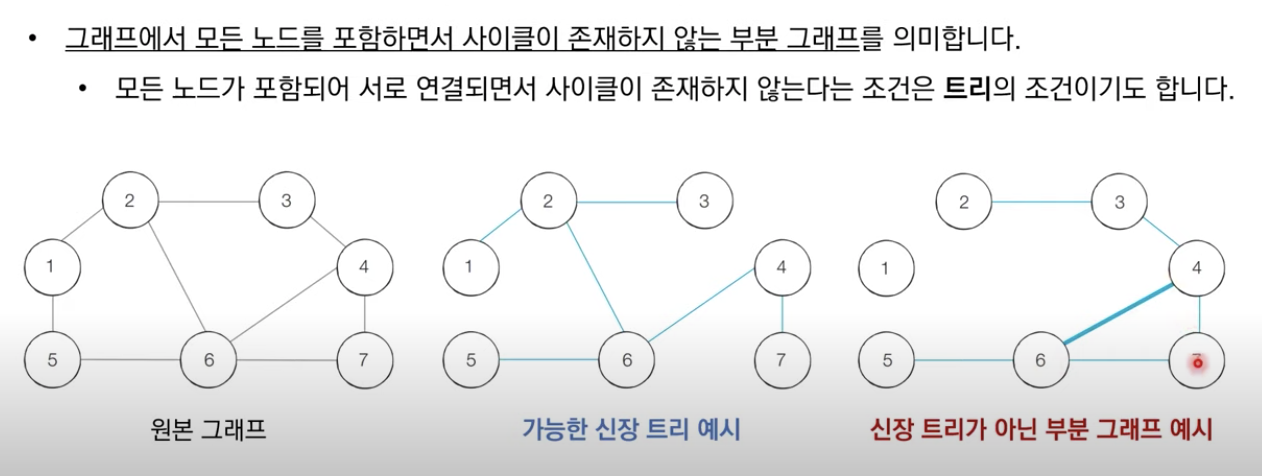

# 크루스칼 알고리즘
step1 비용을 기준으로 오름차순으로 나열한다.

step2 간선을 하나씩 확인(cost가 낮은순으로) 현재의 간선이 사이클을 발생시키는 지 확인한다.
    <br>1) 사이클이 발생하지 않는 경우, 최소 신장 트리에 추가합니다.
    <br>2) 사이클이 발생하는 경우, 최소 신장 트리에 추가하지 않습니다.

step3 모든 간선에 대하여 2번의 과정을 반복합니다.

In [ ]:
# 특정 원소가 속한 집합을 찾기
def find_parent(parent,x):
    if parent[x] != x:
        parent[x] = find_parent(parent,parent[x]) #root로 초기화
    return parent[x]

def union_parent(parent,a,b):
    a = find_parent(parent,a)
    b = find_parent(parent,b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

v, e = map(int, input().split())
parent = [0] * (v+1)

edges = []
result = 0
# 자기 자신으로 parent를 갱신
for i in range(1, v+1):
    parent[i] = i

# 간선정보 받기
for _ in range(e):
    a,b,cost = map(int, input().split)
    edges.append((cost,a,b))

edges.sort()
for edge in edges:
    cost, a, b = edge
    # 사이클이 발생하지 않은 경우에만
    if find_parent(parent,a) != find_parent(parent,b):
        union_parent(parent,a,b)
        result += cost
print(result)
    